In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sentiment-prediction-on-movie-reviews/movies.csv
/kaggle/input/sentiment-prediction-on-movie-reviews/sample.csv
/kaggle/input/sentiment-prediction-on-movie-reviews/train.csv
/kaggle/input/sentiment-prediction-on-movie-reviews/test.csv


### Import necessary libraries

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import sklearn
import re

### Laoding the required data as dataframe

In [3]:

movies = pd.read_csv("/kaggle/input/sentiment-prediction-on-movie-reviews/movies.csv")
test = pd.read_csv("/kaggle/input/sentiment-prediction-on-movie-reviews/test.csv")
train = pd.read_csv("/kaggle/input/sentiment-prediction-on-movie-reviews/train.csv")
sample = pd.read_csv("/kaggle/input/sentiment-prediction-on-movie-reviews/sample.csv")


****DATA EXPLORATION****

In [4]:
# printing shape of movies data and train data

print('movies shape:',movies.shape)
print('train shape:',train.shape)

movies shape: (143258, 14)
train shape: (162758, 5)


In [5]:
# checking colums of movies and train data to see the common column

print('movies cols :',movies.columns,'\n')
print('train cols :',train.columns)

# only movieid column is common in both the dat sets

movies cols : Index(['movieid', 'title', 'audienceScore', 'rating', 'ratingContents',
       'releaseDateTheaters', 'releaseDateStreaming', 'runtimeMinutes',
       'genre', 'originalLanguage', 'director', 'boxOffice', 'distributor',
       'soundType'],
      dtype='object') 

train cols : Index(['movieid', 'reviewerName', 'isFrequentReviewer', 'reviewText',
       'sentiment'],
      dtype='object')


In [6]:
# checking the type of colums in movies data
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143258 entries, 0 to 143257
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   movieid               143258 non-null  object 
 1   title                 143258 non-null  object 
 2   audienceScore         73248 non-null   float64
 3   rating                13991 non-null   object 
 4   ratingContents        13991 non-null   object 
 5   releaseDateTheaters   30773 non-null   object 
 6   releaseDateStreaming  79420 non-null   object 
 7   runtimeMinutes        129431 non-null  float64
 8   genre                 132175 non-null  object 
 9   originalLanguage      129400 non-null  object 
 10  director              143258 non-null  object 
 11  boxOffice             14743 non-null   object 
 12  distributor           23005 non-null   object 
 13  soundType             15917 non-null   object 
dtypes: float64(2), object(12)
memory usage: 15.3+ MB


In [7]:
# checking duplicate rows in movies data if any

print('total duplicate rows in movies ;',movies.duplicated().sum(),'\n')

movies[movies.duplicated()]

total duplicate rows in movies ; 1571 



,movieid,title,audienceScore,rating,ratingContents,releaseDateTheaters,releaseDateStreaming,runtimeMinutes,genre,originalLanguage,director,boxOffice,distributor,soundType
1126,escape_the_terminator_tyler_durden_astonish,Escape The Terminator Tyler Durden Astonish,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Joseph Brooks,NaN,NaN,NaN
3772,supreme_indiana_jones,Supreme Indiana Jones,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Augusta Daniel,NaN,NaN,NaN
5048,escape_the_terminator_tyler_durden_astonish,Escape The Terminator Tyler Durden Astonish,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Joseph Brooks,NaN,NaN,NaN
7364,escape_the_terminator_tyler_durden_astonish,Escape The Terminator Tyler Durden Astonish,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Joseph Brooks,NaN,NaN,NaN
8012,holly_golightly_enthralling,Holly Golightly Enthralling,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Augusta Daniel,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140598,cosmic_jack_torrance_ellis_redding_indiana_jones,Cosmic Jack Torrance Ellis Redding Indiana Jones,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Augusta Daniel,NaN,NaN,NaN
140654,the_bride_hannibal_lecter_enigma_black_widow,The Bride Hannibal Lecter Enigma Black Widow,NaN,NaN,NaN,NaN,NaN,89.0,Drama,English,Raul Glover,NaN,NaN,NaN
141470,wolverine_tony_montana_wolverine,Wolverine Tony Montana Wolverine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Augusta Daniel,NaN,NaN,NaN
142468,escape_the_terminator_tyler_durden_astonish,Escape The Terminator Tyler Durden Astonish,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Joseph Brooks,NaN,NaN,NaN


In [8]:
# checking run time minutes for same movie to see if there is any difference
movies[movies['movieid']== 'escape_the_terminator_tyler_durden_astonish']['runtimeMinutes']

# conclusion: yes there is difference in run time

871         NaN
1126        NaN
4038      140.0
5048        NaN
7364        NaN
          ...  
136493     89.0
137235      NaN
137815      NaN
140080      NaN
142468      NaN
Name: runtimeMinutes, Length: 367, dtype: float64

In [9]:
# dropping duplicate rows from the movies data to obtain unique rows

movies_uniq = movies.drop_duplicates(keep = 'first', inplace = False)
movies_uniq.duplicated().sum()

0

In [10]:
# duplicate movie id but with unique attributes such as audience score and runtime

movies_uniq.duplicated(['movieid']).sum()
movies_uniq.shape

(141687, 14)

In [11]:
# creating pivot table movied wise taking average audience score and runtime

pd.pivot_table(movies_uniq,index = 'movieid',values = ['audienceScore','runtimeMinutes'],aggfunc = np.mean)

,audienceScore,runtimeMinutes
movieid,,
adventure_anakin_skywalker,49.0,96.0
adventure_anakin_skywalker_chronicles_whisper,NaN,90.0
adventure_astonish,40.0,90.0
adventure_astonish_wondrous_beneath,60.0,96.0
adventure_aurora_epic,NaN,60.0
...,...,...
zephyr_wonder_woman,38.0,97.0
zephyr_wonder_woman_wonder,95.0,175.0
zephyr_wondrous,56.0,NaN


In [12]:
# Applying same prosess on train dataset as on movies i.e removing duplicate rows.

print('duplicate rows in train :', train.duplicated().sum(),'\n')
train[(train.duplicated())]


duplicate rows in train : 1118 



,movieid,reviewerName,isFrequentReviewer,reviewText,sentiment
2667,pirate_holly_golightly_marty_mcfly_zephyr,Kristy Ferguson,False,The mixture of the mundane and the poetic in '...,POSITIVE
4263,dragon_holly_golightly,Zachary Riggs,False,They call documentary which is actually a prop...,POSITIVE
6499,kingdom_sherlock_holmes_tony_montana_ferris_bu...,Taylor Abbott,False,"Shortchanges the courtroom scenes, where the s...",NEGATIVE
7010,dragon_holly_golightly,Zachary Riggs,False,They call documentary which is actually a prop...,POSITIVE
7863,hulk_rocky_balboa_hidden_chronicles,Mr. Stanley Martinez,False,"While it gets credit for audacity, the film su...",NEGATIVE
...,...,...,...,...,...
162421,epic_hulk_marty_mcfly,Larry Patterson,False,This tries to break the mold of the standard r...,NEGATIVE
162441,marty_mcfly_dorothy_gale_marvelous,Tammy Welch,False,How could such good intentions result in such ...,NEGATIVE
162451,jon_snow_tony_montana_sherlock_holmes,Carl Vaughan,False,The pleasant surprise is that it's often funny...,POSITIVE
162489,sorcerer_darth_vader_sapphire_tony_montana,Lauren Dunn,False,The simple conception of the documentary belie...,POSITIVE


In [13]:
# creating train_uniq from train data after removing duplicate rows except first 

train_uniq = train.drop_duplicates(keep = 'first', inplace = False)
train_uniq.duplicated().sum()

0

In [14]:
# total unique movieid row though the movied is same but corresponding col values are different

print('total unique rows:',train_uniq.duplicated(['movieid']).sum(),'\n')
train_uniq[train_uniq['movieid']=='emerald_oracle_iron_man_wolverine']

total unique rows: 144828 



,movieid,reviewerName,isFrequentReviewer,reviewText,sentiment
18985,emerald_oracle_iron_man_wolverine,Danielle Jimenez,False,NaN,NEGATIVE
80206,emerald_oracle_iron_man_wolverine,Sherri Morrison,True,"In this formulaic star vehicle, Schwarzenegger...",NEGATIVE
111286,emerald_oracle_iron_man_wolverine,Michael Cross,True,"Here's Arnie, of all people, playing a bedragg...",POSITIVE
130119,emerald_oracle_iron_man_wolverine,Daniel Schneider,True,NaN,NEGATIVE
162756,emerald_oracle_iron_man_wolverine,Erik Parker,False,"The film is rescued by a strong third act, but...",NEGATIVE


In [15]:
# remove duplicate movieid from movies_uniq dataset before merging with train_uniq data
movie_1 = movies_uniq.drop_duplicates(subset = 'movieid', keep = 'first')

# check shape after removing duplicates
movie_1.shape

(126404, 14)

In [16]:
# exploratory data analysis
# merge movies_uniq and train_uniq
merged_data = pd.merge(movie_1,train_uniq,on = 'movieid', how = 'inner')
merged_data.shape

(161640, 18)

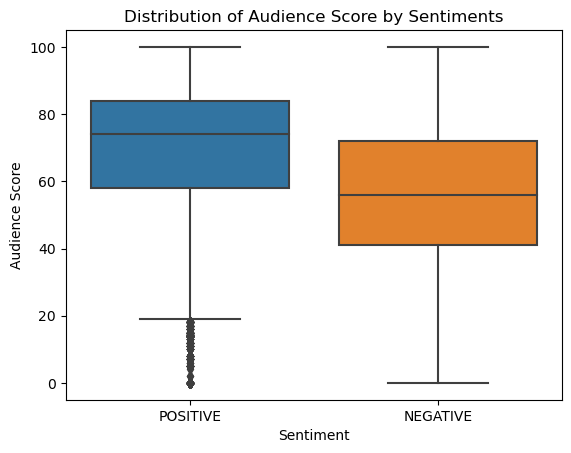

In [17]:
# visualize possible relation between audience score and sentiments
# plotting boxplot using seaborn (to filter outliers)

sns.boxplot(x='sentiment', y='audienceScore', data = merged_data)
plt.xlabel('Sentiment')
plt.ylabel('Audience Score')
plt.title('Distribution of Audience Score by Sentiments')
plt.show()

# movies with positive sentiments have better average audienceScore as comapred to negative sentiments.
# this is as expected

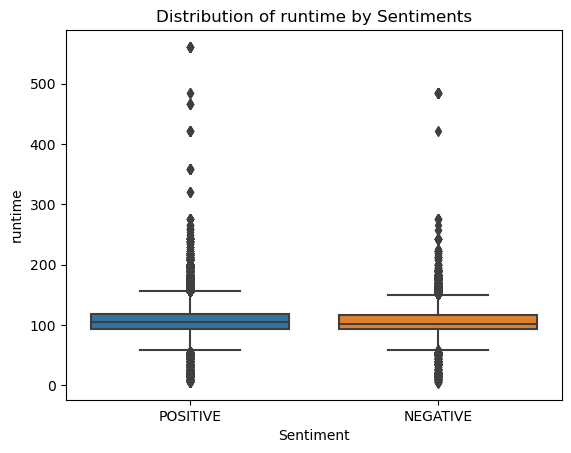

In [18]:
# checking if movies that have postive sentiment or negative sentiment do not have any significant differenec in runtime.
# plotting boxplot using seaborn (to filter outliers)

sns.boxplot(x='sentiment', y='runtimeMinutes', data= merged_data)
plt.xlabel('Sentiment')
plt.ylabel('runtime')
plt.title('Distribution of runtime by Sentiments')
plt.show()

# it can be concluded that runtime Minutes doesn't have any bearing on the sentiment.

**DATA PREPROCESSING**

In [19]:
# My intution is to go with orignal train data to train my models
# The problem statement clearly mentions reviewText is quintessential for predicting sentiments
# the train data has required columns
# checking nulls is original train
train.isnull().sum()

movieid                  0
reviewerName             0
isFrequentReviewer       0
reviewText            6447
sentiment                0
dtype: int64

In [20]:
# removing nulls from train data
train = train.dropna(axis = 0)

# rechecking nulls if any after removing

print('checking nulls in train data if any after removing nulls :', train.isnull().sum())

checking nulls in train data if any after removing nulls : movieid               0
reviewerName          0
isFrequentReviewer    0
reviewText            0
sentiment             0
dtype: int64


In [21]:
# checking colums in train data
train.head()

,movieid,reviewerName,isFrequentReviewer,reviewText,sentiment
0,marvelous_pirate,Benjamin Henry,False,Henry Selick’s first movie since 2009’s Corali...,POSITIVE
1,tony_montana_frodo_baggins_v_rocky_balboa,Felicia Lopez,False,With a cast that reads like the Vogue Oscar pa...,NEGATIVE
2,darth_vader_katniss_everdeen_sorcerer_donnie_d...,Mr. Charles Burgess,True,Creed II does not give us anything but another...,POSITIVE
3,lara_croft_glimmer,Ryan Barrett,False,"I know what you're thinking, but this is no Li...",POSITIVE
4,jason_bourne_surreal_the_terminator_indiana_jones,Alexander Glover,False,Director Fernando Meirelles tells the story wi...,POSITIVE


In [22]:
# print shape of train and test data for future purpose
print("train data shape: ",train.shape)
print("test data shape: ",test.shape)

train data shape:  (156311, 5)
test data shape:  (55315, 4)


In [23]:
# fetching reviewText column from test data and calling it X_test
# as we need it for prediction

X_test = test.iloc[:,-1]



In [24]:
# slicing train data into features and label columns 
# X = feature i.e.reviewText
# y = labels i.e. sentiments

X = train.iloc[:,3:4]
y = train['sentiment']
print(X.shape)
print(y.shape)
X.head()

(156311, 1)
(156311,)


,reviewText
0,Henry Selick’s first movie since 2009’s Corali...
1,With a cast that reads like the Vogue Oscar pa...
2,Creed II does not give us anything but another...
3,"I know what you're thinking, but this is no Li..."
4,Director Fernando Meirelles tells the story wi...


In [25]:
# encoding sentiments using label encoder

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encode = le.fit_transform(y)
print(pd.Series(y_encode).head())

# positive is 1 and negative as 0.

0    1
1    0
2    1
3    1
4    1
dtype: int64


In [26]:
# checking distribution for sentiments
print(pd.Series(y_encode).value_counts(),'\n')
print(pd.Series(y_encode).value_counts(normalize = True)*100)

# 2/3 are positive and 1/3 are negative.

1    104719
0     51592
dtype: int64 

1    66.994006
0    33.005994
dtype: float64


Axes(0.22375,0.11;0.5775x0.77)


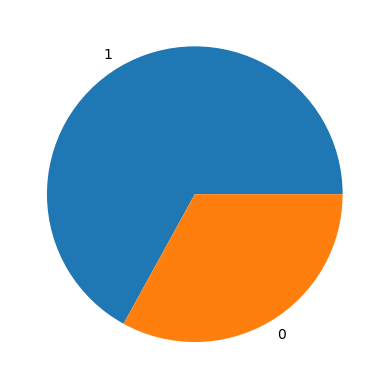

In [27]:
# Visualizing the sentiment distribution in our data by plotting a pie chart for y_encode
print(pd.Series(y_encode).value_counts(normalize = True).plot.pie())

In [28]:
#function for preprocessing reviews

def review_cleaning(reviews):
    if isinstance(reviews,str): #check if element is string
        reviews = reviews.lower() # to lower case.
        pattern = '[^\w\s]'       # pattern to identify punctuations etc.
        reviews = re.sub(pattern,'',reviews) # removing punctuations
        pattern = '\w*\d\w*'    # pattern to identify digits 
        reviews = re.sub(pattern,'',reviews) # removing digits
    return reviews

# removed digits as these are noise in the data for sentiment analysis.

In [29]:
# print X before applying cleaning function
print(X.head())


                                          reviewText
0  Henry Selick’s first movie since 2009’s Corali...
1  With a cast that reads like the Vogue Oscar pa...
2  Creed II does not give us anything but another...
3  I know what you're thinking, but this is no Li...
4  Director Fernando Meirelles tells the story wi...


In [30]:
# cleaning the reviews using review_cleaning function
X['reviewText'] = X['reviewText'].apply(review_cleaning)
print(X.shape)
X.head()

(156311, 1)


,reviewText
0,henry selicks first movie since coraline his ...
1,with a cast that reads like the vogue oscar pa...
2,creed ii does not give us anything but another...
3,i know what youre thinking but this is no limi...
4,director fernando meirelles tells the story wi...


In [31]:
# Similarly cleaning X_test reviews.
X_test = X_test.apply(review_cleaning)
X_test.head()

0    green slowly cranks up the dread with style an...
1    philip noyces direction is elegant and unforce...
2    it wouldnt do to say what path maria ultimatel...
3    pig is not exactly the arthouse john wick that...
4    an imaginative nobudget musical of sorts about...
Name: reviewText, dtype: object

In [32]:
# instead of droppin null values in test data replace all np.nan with empty string as we cann't reduce number pf rows. 
X_test = X_test.replace(np.nan,'')
X_test.shape

(55315,)

In [33]:
# Applying TfidfVectorizer to process the text data for model building
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words = ['a','an','the','i'] ,ngram_range = (1,2))
X_new = tfidf.fit_transform(X['reviewText'])
X_new.shape

(156311, 1161938)

In [34]:
# splitting train data into train and validation set using train_test_split.
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train , y_valid = train_test_split(X_new,y_encode,test_size = 0.2 , random_state = 42)
print("shape of X_train: ",X_train.shape)
print("shape of X_valid: ",X_valid.shape)
print("shape of y_train: ",y_train.shape)
print("shape of y_valid: ",y_valid.shape)


shape of X_train:  (125048, 1161938)
shape of X_valid:  (31263, 1161938)
shape of y_train:  (125048,)
shape of y_valid:  (31263,)


In [35]:
# Since data is huge,select best features for the model training purpose by using SelectPercentile
# will take percentile = 10 for faster fitting

# feature selection
from sklearn.feature_selection import SelectPercentile,chi2
selector = SelectPercentile(score_func = chi2, percentile = 10)
selected_X_train = selector.fit_transform(X_train,y_train)
selected_X_test = selector.transform(X_valid)

In [36]:
# creating the document term matrix for X_test.
X_test_dtm = tfidf.transform(X_test)
print(X_test_dtm.shape)

X_test_new = selector.transform(X_test_dtm)
print(X_test_new.shape)

(55315, 1161938)
(55315, 116193)


**1.
MODEL-1: LOGISTIC REGRESSION**

In [37]:
# Initialising logistic regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()


In [38]:
# necessary import for model evaluation.
from sklearn import metrics
from sklearn.metrics import classification_report,accuracy_score as acc
from sklearn.metrics import f1_score as f1,precision_score as prec 
from sklearn.metrics import recall_score as rec, roc_auc_score as auc



In [39]:
# defining parameters for hypertuning
params = {'solver':['liblinear','sag','saga'],
    'C':[0.001,.01,0.1,1,10],
    'class_weight': ['None','balanced']
         }

# intialising GridSearchCV
from sklearn.model_selection import GridSearchCV
gd = GridSearchCV(estimator = lr,
                  param_grid = params,
                  verbose = 1,
                  cv = 5,
                  n_jobs = -1)


In [40]:
import warnings
warnings.filterwarnings('ignore')

In [41]:
# fitting grid search cv on train data
gd.fit(selected_X_train,y_train)


Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'class_weight': ['None', 'balanced'],
                         'solver': ['liblinear', 'sag', 'saga']},
             verbose=1)

In [42]:
# finding the best hyper parameters
gd.best_estimator_

LogisticRegression(C=10, class_weight='balanced', solver='sag')

In [43]:
lr_best = gd.best_estimator_
lr_best.fit(selected_X_train,y_train)

LogisticRegression(C=10, class_weight='balanced', solver='sag')

In [44]:
# eavlauting model performance on our validation(test) data, that we kept during train test split.
y_pred_best = lr_best.predict(selected_X_test)
print(classification_report(y_valid,y_pred_best))

              precision    recall  f1-score   support

           0       0.73      0.73      0.73     10148
           1       0.87      0.87      0.87     21115

    accuracy                           0.83     31263
   macro avg       0.80      0.80      0.80     31263
weighted avg       0.83      0.83      0.83     31263



In [45]:
# Adding the accuracy metrics for Logistic Regression to the model comparison data frame
# code block for comparing accuracies of model in dataframe format

logreg_best_accuracy = round(acc(y_valid, y_pred_best),2)
logreg_best_f1 = round(f1(y_valid, y_pred_best),2)
logreg_best_precision = round(prec(y_valid, y_pred_best),2)
logreg_best_recall= round(rec(y_valid, y_pred_best),2)
logreg_best_auc = round(auc(y_valid, y_pred_best),2)

# adding above metrics to dictionary to add in the model comparision data frame

data = {'Model Name': ['Logistic Regression'],
       'Weighted Accuracy': [logreg_best_accuracy],
       'F1 Score': [logreg_best_f1],
       'Precision': [logreg_best_precision],
       'Recall': [logreg_best_recall],
       'ROC_AUC': [logreg_best_auc]}

temp_df = pd.DataFrame.from_dict(data)

model_comparison = pd.DataFrame.from_dict(data)
model_comparison.head()

          

,Model Name,Weighted Accuracy,F1 Score,Precision,Recall,ROC_AUC
0,Logistic Regression,0.83,0.87,0.87,0.87,0.8


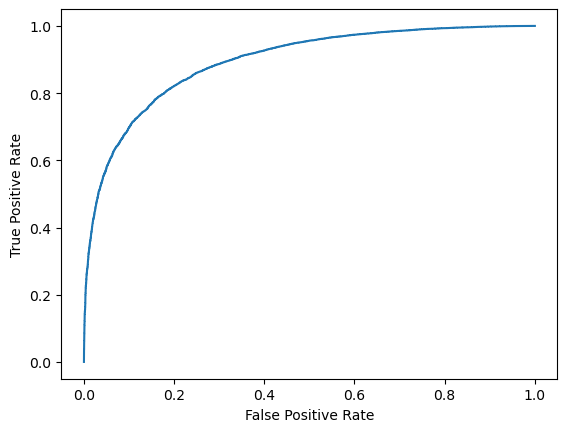

In [46]:
# ploting roc-auc curve for logistic regression.

y_pred_proba = lr_best.predict_proba(selected_X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_valid,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [47]:
# applying logistic regression on original test data.
y_test_pred = lr_best.predict(X_test_new )


In [48]:
# converting output to string
y_test_pred = ["POSITIVE" if pred == 1 else "NEGATIVE" for pred in y_test_pred]


 **2. MODEL-2 : Linear SVC**


In [49]:
# intialising Linear SVC
from sklearn.svm import LinearSVC
svc = LinearSVC()

In [50]:
# defining parameters for hypertuning
param = {'C': [0.001,0.01,0.1,1.0,10.0],
         'loss':['hinge','squared_hinge'],
         'class_weight':['balanced'],
         'tol':[1e-5,1e-6],
        
        }

In [51]:
import warnings
warnings.filterwarnings('ignore')

In [52]:
# initialing GridSearchCV

from sklearn.model_selection import GridSearchCV
gd = GridSearchCV(estimator = svc,
                  param_grid = param,
                  verbose = 1,
                  cv = 5,
                  n_jobs = -1)
gd.fit(selected_X_train,y_train)



Fitting 5 folds for each of 20 candidates, totalling 100 fits


/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

GridSearchCV(cv=5, estimator=LinearSVC(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1.0, 10.0],
                         'class_weight': ['balanced'],
                         'loss': ['hinge', 'squared_hinge'],
                         'tol': [1e-05, 1e-06]},
             verbose=1)

In [53]:
# getting best parameters
gd.best_estimator_

LinearSVC(class_weight='balanced', tol=1e-05)

In [54]:
svc_best = gd.best_estimator_
svc_best.fit(selected_X_train,y_train)

LinearSVC(class_weight='balanced', tol=1e-05)

In [55]:
# eavlauting model performance on our validation(test) data, that we kept during train test split.
y_pred_svc = svc_best.predict(selected_X_test)
print(classification_report(y_valid,y_pred_svc))

              precision    recall  f1-score   support

           0       0.74      0.72      0.73     10148
           1       0.87      0.88      0.87     21115

    accuracy                           0.83     31263
   macro avg       0.80      0.80      0.80     31263
weighted avg       0.82      0.83      0.82     31263



In [56]:
logreg_best_accuracy = round(acc(y_valid, y_pred_svc),2)
logreg_best_f1 = round(f1(y_valid, y_pred_svc),2)
logreg_best_precision = round(prec(y_valid,y_pred_svc),2)
logreg_best_recall= round(rec(y_valid,y_pred_svc),2)
logreg_best_auc = round(auc(y_valid,y_pred_svc),2)

# adding above metrics to dictionary to add in the model comparision data frame

data = {'Model Name': ['Linear SVC'],
       'Weighted Accuracy': [logreg_best_accuracy],
       'F1 Score': [logreg_best_f1],
       'Precision': [logreg_best_precision],
       'Recall': [logreg_best_recall],
       'ROC_AUC': [logreg_best_auc]}

temp_df = pd.DataFrame.from_dict(data)

model_comparison = pd.concat([model_comparison,temp_df],ignore_index = False)
model_comparison


,Model Name,Weighted Accuracy,F1 Score,Precision,Recall,ROC_AUC
0,Logistic Regression,0.83,0.87,0.87,0.87,0.8
0,Linear SVC,0.83,0.87,0.87,0.88,0.8


In [57]:
# testing linear svc on test data i.e. X_test_new
y_pred_svc = svc_best.predict(X_test_new )


In [58]:
y_pred_svc = ["POSITIVE" if pred == 1 else "NEGATIVE" for pred in y_pred_svc]

**3. MODEL- 3 : PERCEPTRON**


In [59]:
# instantiating Perceptron
from sklearn.linear_model import Perceptron
perceptron = Perceptron()

In [60]:
# defining parameters for perceptron
param_percep = {'penalty':['l2','l1'], 
             'alpha':[0.0001,0.001,0.1],
             'max_iter':[50,100,200,500],
            'eta0':[0.001,0.01,0.1]
            }

In [61]:
# initiliasing grid search cv for perceptron
gd = GridSearchCV(estimator = perceptron,
                  param_grid = param_percep,
                  verbose = 1,
                  cv = 5,
                  n_jobs = -1)
gd.fit(selected_X_train,y_train)


Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5, estimator=Perceptron(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.1],
                         'eta0': [0.001, 0.01, 0.1],
                         'max_iter': [50, 100, 200, 500],
                         'penalty': ['l2', 'l1']},
             verbose=1)

In [62]:
gd.best_estimator_

Perceptron(eta0=0.001, max_iter=50, penalty='l2')

In [63]:
perceptron_best = gd.best_estimator_
perceptron_best.fit(selected_X_train,y_train)

Perceptron(eta0=0.001, max_iter=50, penalty='l2')

In [64]:
y_pred_percep = perceptron_best.predict(selected_X_test)
print(classification_report(y_valid,y_pred_percep))

              precision    recall  f1-score   support

           0       0.68      0.63      0.65     10148
           1       0.83      0.86      0.84     21115

    accuracy                           0.78     31263
   macro avg       0.75      0.74      0.75     31263
weighted avg       0.78      0.78      0.78     31263



In [65]:
logreg_best_accuracy = round(acc(y_valid,y_pred_percep),2)
logreg_best_f1 = round(f1(y_valid,y_pred_percep),2)
logreg_best_precision = round(prec(y_valid,y_pred_percep),2)
logreg_best_recall= round(rec(y_valid, y_pred_percep),2)
logreg_best_auc = round(auc(y_valid, y_pred_percep),2)

# adding above metrics to dictionary to add in the model comparision data frame

data = {'Model Name': ['Perceptron'],
       'Weighted Accuracy': [logreg_best_accuracy],
       'F1 Score': [logreg_best_f1],
       'Precision': [logreg_best_precision],
       'Recall': [logreg_best_recall],
       'ROC_AUC': [logreg_best_auc]}

temp_df = pd.DataFrame.from_dict(data)

model_comparison = pd.concat([model_comparison,temp_df],ignore_index = False)
model_comparison


,Model Name,Weighted Accuracy,F1 Score,Precision,Recall,ROC_AUC
0,Logistic Regression,0.83,0.87,0.87,0.87,0.80
0,Linear SVC,0.83,0.87,0.87,0.88,0.80
0,Perceptron,0.78,0.84,0.83,0.86,0.74


### BEST 3 MODEL COMPARISON

1. Logistic Regression: is the second best performing model for sentiment prediction with public socre = 0.81719.
2. Linear SVC: is the best performing model with public score = 0.81744
3. Perceptron, Random Forest Classifier and other models like Decision Tree Classifier and KNN performed poorly. 

Thus, Linear SVC is my final submission model.

### Final Submission

In [66]:
# final submission (svc)

sub = pd.DataFrame(y_pred_svc, columns=['sentiment'])
sub.index.name = 'id'
sub.to_csv("submission.csv", encoding='utf-8')

output = pd.read_csv("submission.csv")


### ANALYZING RESULT

 On mergeing movies and train data and after visulisation I found that:
1. movies with positive sentiments have better average audienceScore as comapred to negative sentiments.
2. movies that have postive sentiment or negative sentime do not have any significant differenec in runtime.